<a href="https://colab.research.google.com/github/beatricexc/Unsupervised-Learning-Standardisation/blob/main/Unsupervised_Learning_Standardisation%2BPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np #linear algebra
import pandas as pd # data processing  CSVfile Io (ed pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output

In [4]:
# read csv into data
data = pd.read_csv("/content/drive/MyDrive/column_2C_weka.csv")
print(plt.style.available) # check the available plot styles
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Exploratory Data Analysis (EDA) for Supervised Learning

In [ ]:
# to see the features and the target variables 
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
# checking for empty values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


pd.plotting.scatter_matrix

- green: *normal* and red: *abnormal*
- c: color
- figsize: figure size 
- diagonal : histogram of each featurew
- alpha: opacity 
- s: size of marker
- marker: marker type

## Unsupervised Learning

- uses unlabled data and it is used to uncover hidden patterns from unlabeled data sets. 

### KMeans Cluster
- unsupervised methad 
- this algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 
- data points are then clustered based on feature similarity
- KMeans(n_clusters = 2): n_clusters = 2 means that create 2 clusters

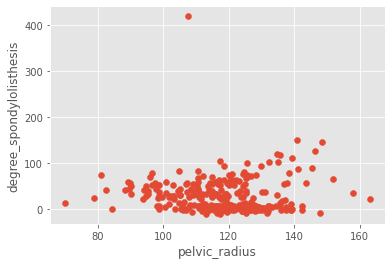

In [8]:
data = pd.read_csv('/content/drive/MyDrive/column_2C_weka.csv')
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()


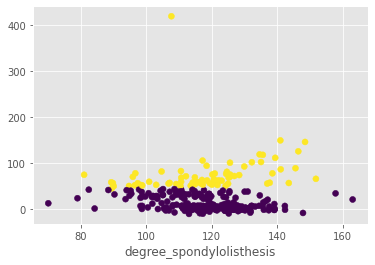

In [9]:
# Kmeans Clustering 
data2 = data.loc[:, ['degree_spondylolisthesis', 'pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'], c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

We have clustered the data into two . In order to check if this is the correct clustering, we will use the cross tabulation table. 

- there are two clusters that are 0 and 1
- first class 0 includes 138 abnormal and 100 normal patients
- seecond class includes 72 abnormal and 0 normal patients. *The majority of two clusters are abnormal patients.


In [10]:
# cross tabulation table
df = pd.DataFrame({'labels' : labels, "class" : data['class']})
ct = pd.crosstab(df['labels'], df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


The new question is that we know how many class data includes, but what if the number of class is unknown in the data. This is similar to the hyperparameter in KNN or regression

- inertia: how spread out is the cluster distance from each sample (It is the sum of squared distances of samples to their closest cluster center.)
- lower inertia = more clusters
- What is the best number of clusters? There is low inertia and not too many clusters  tradeoff so we can choose the elbow method

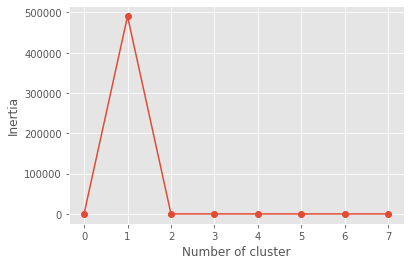

In [11]:
# inertia

inertia_list = np.empty(8)
for i in range(1, 8):
  kmeans = KMeans(n_clusters=1)
  kmeans.fit(data2)
  inertia_list[1]= kmeans.inertia_

plt.plot(range(0,8), inertia_list, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

## Standardisation

- this is important for both supervised and unsupervised learning
- standardisation is a pre-processing element
- as we have already visualised the data, we can use all features for clustering
- we can use pipeline like supervised learning

In [5]:
data = pd.read_csv("/content/drive/MyDrive/column_2C_weka.csv")
data3= data.drop('class', axis = 1)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             94      90
1            116      10


## Hierarchy 
- vertical lines are clusters
- height on dendogram: distance between merging clusters
- method = 'single': closest points of clusters 


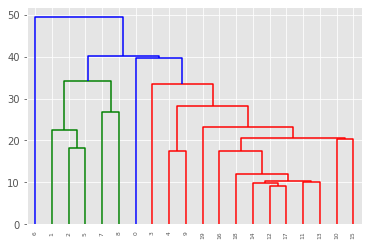

In [17]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

## T-Distributed Stochastic Neighbor Embedding (T-SNE)

- learning rate: 50-200 in normal
- fit_transform: it is both fit and transform 
- varietes have the same position to one another 

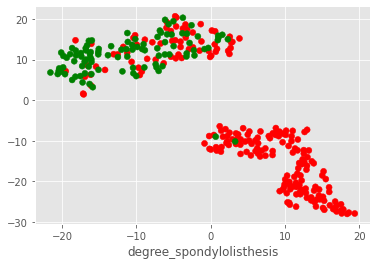

In [55]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
color_list = ['red' if i == 'Abnormal' else 'green' for i in data.loc[:, 'class']]
plt.scatter(x,y, c= color_list)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

## Principle Component Analysis (PCA)

- Fundamental dimension reduction technique
- first step is decorrelation: 
   <ul type ="square" >
   <li> rotates data samples to be aligned with axes
   <li> shifts data samples so they have the mean 0 
   <li> no information is lost
   <li> fit(): learn how to shift samples
   <li> transform(): apply the learnt transformation. 
It can also be applied to test data

- Resulting PCA features are not linearly correlated
- Principle components: directions of variance.

In [56]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ', model.components_)

Principle components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08931753e-11 -5.77350269e-01
  -3.59057228e-12  3.06721315e-12]]


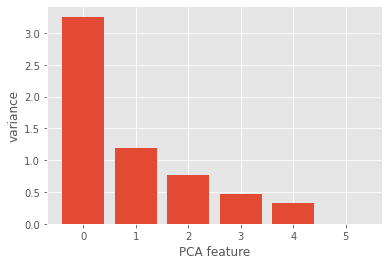

In [58]:
# PCA variance 
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

- Second step: intrinsic dimension = the number of features needed to approximate the essential data behind dimension reduction
- PCA identifies intrinsinc dimension when samples have any number of features
- intrinsic dimension = number of PCA feature with significant variance
- In order to choose intrinsic dimension, try all of them and find best accuracy


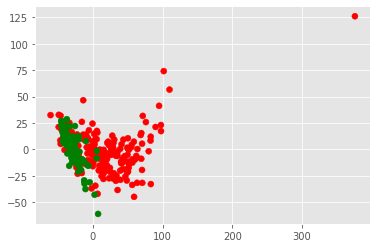

In [60]:
# apply PCA

pca = PCA(n_components=2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:, 0]
y = transformed[:, 1]
plt.scatter(x, y, c = color_list)
plt.show()